# Supervised Learning model's quality measures

## Confusion Matrix

Model Accuracy: 0.9777777777777777


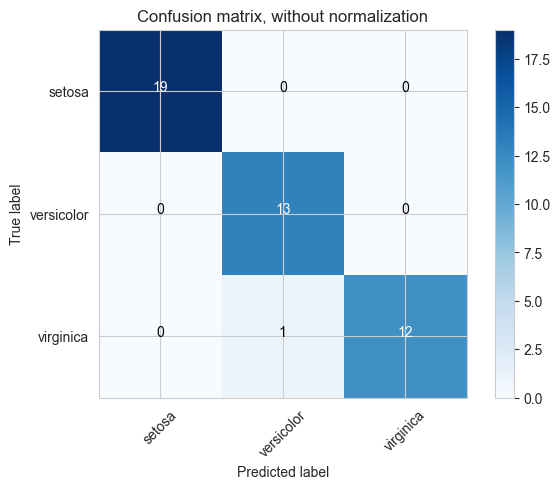

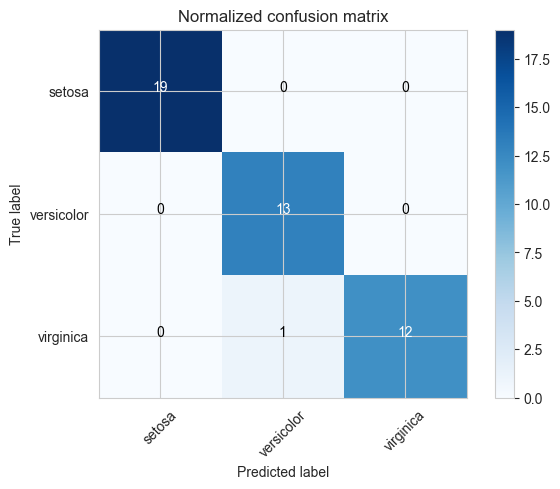

In [23]:
from sklearn.tree import DecisionTreeClassifier
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Create a decision tree classifier
clf = DecisionTreeClassifier(
    # Hyper-parameters tuning
    criterion="entropy", # entropy
    # max_depth=2,
    # min_samples_leaf=20,
    # min_samples_split=20
    random_state=42)

# Train the model
clf.fit(X_train, y_train)

y_pred = clf.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Accuracy, Precision, Recall, Especificity, F1-Score

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='macro')
print(f"Model Precision: {precision}")

recall = recall_score(y_test, y_pred, average='macro')
print(f"Model Recall: {recall}")

f1 = f1_score(y_test, y_pred, average='macro')
print(f"Model F1-Score: {f1}")

Model Accuracy: 0.9777777777777777
Model Precision: 0.9761904761904763
Model Recall: 0.9743589743589745
Model F1-Score: 0.9743209876543211


## Cross Validation

[1.   1.   0.83 0.93 0.8 ]


C:\Users\mgarralda\AppData\Local\Temp\ipykernel_24644\2226629748.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fold', y='Accuracy', data=df, palette='Blues_d')


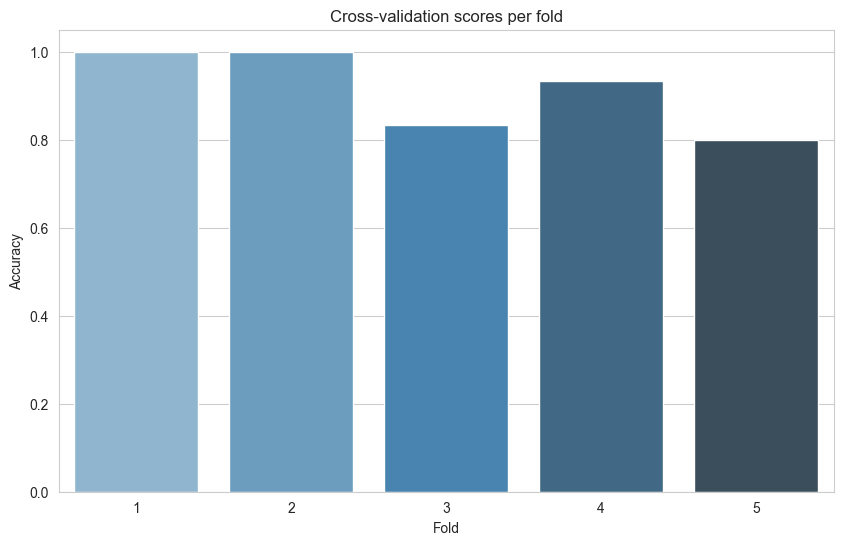

In [35]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy') # you can use 'precision', 'recall', 'f1', 'roc_auc', etc.
print(f"{scores}\n")

# Create a DataFrame for better visualization
df = pd.DataFrame()
df['Fold'] = range(1, len(scores) + 1)
df['Accuracy'] = scores

# Create a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Fold', y='Accuracy', data=df, palette='Blues_d')

plt.title('Cross-validation scores per fold')
plt.show()
